<a href="https://colab.research.google.com/github/Abdulmathin-shaik/Kaggle/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import sklearn

In [12]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()

In [14]:
x,y = iris.data, iris.target

In [15]:
import pandas as pd

In [37]:
df = pd.DataFrame(x, columns=iris.feature_names)

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
df = scaler.fit_transform(df)

In [42]:
df.shape

(150, 4)

In [43]:
df[:,1].max()

1.0

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [47]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [48]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [50]:
centroids.shape

(3, 4)

In [27]:
import matplotlib.pyplot as plt

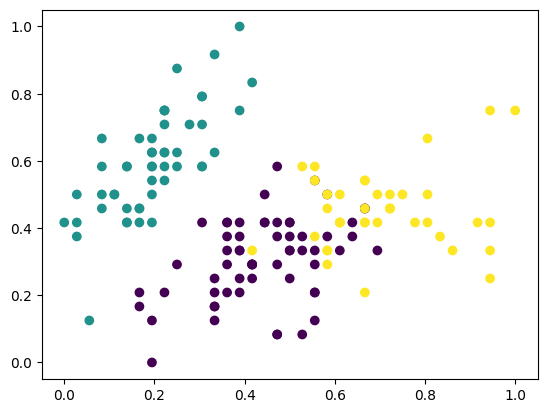

In [51]:
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', marker='o')


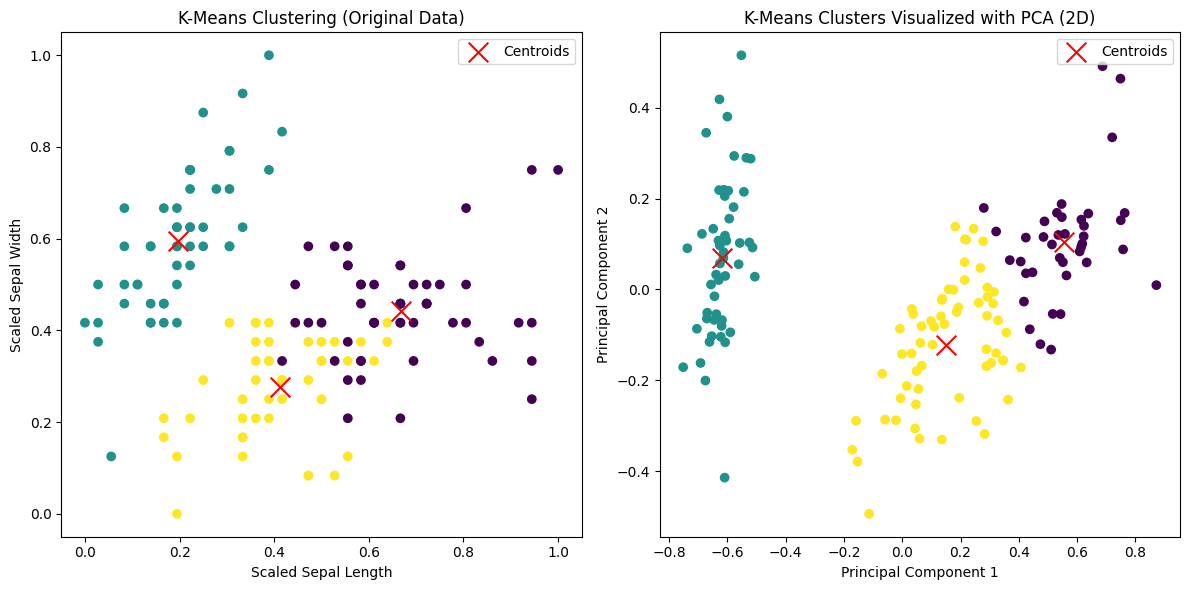

Explained variance ratio of first two components: [0.84136038 0.11751808]
Total variance explained: 0.9588784639918414
Silhouette Score (Original Data): 0.48292893354301647
Calinski-Harabasz Index (Original Data): 351.29506405605156
Silhouette Score (PCA Data): 0.5653841740615906
Calinski-Harabasz Index (PCA Data): 473.62963758280637


In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert data to Pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)

# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


# --- K-Means Clustering on Original Data ---

# Apply K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
kmeans.fit(df_scaled)
labels_original = kmeans.labels_
centroids_original = kmeans.cluster_centers_


# --- K-Means Clustering with PCA ---
# Apply PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# Apply K-Means clustering on PCA reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_
centroids_pca = kmeans_pca.cluster_centers_


# --- Visualization ---

# 1. Visualize clusters in original feature space (2D scatter plot using 2 first features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_original, cmap='viridis', marker='o')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('K-Means Clustering (Original Data)')
plt.legend()


# 2. Visualize clusters in PCA space
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', marker='o')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized with PCA (2D)')
plt.legend()
plt.tight_layout()
plt.show()

# Explained Variance
print("Explained variance ratio of first two components:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# --- Clustering Performance Metrics ---

# Original data
silhouette_avg_original = silhouette_score(df_scaled, labels_original)
calinski_harabasz_original = calinski_harabasz_score(df_scaled, labels_original)

print(f"Silhouette Score (Original Data): {silhouette_avg_original}")
print(f"Calinski-Harabasz Index (Original Data): {calinski_harabasz_original}")

# PCA reduced data
silhouette_avg_pca = silhouette_score(X_pca, labels_pca)
calinski_harabasz_pca = calinski_harabasz_score(X_pca, labels_pca)

print(f"Silhouette Score (PCA Data): {silhouette_avg_pca}")
print(f"Calinski-Harabasz Index (PCA Data): {calinski_harabasz_pca}")

In [36]:
kmeans.labels_

array([2, 8, 8, 8, 2, 7, 8, 2, 8, 8, 7, 2, 8, 8, 7, 7, 7, 2, 7, 2, 2, 2,
       8, 2, 2, 8, 2, 2, 2, 8, 8, 2, 7, 7, 8, 8, 2, 2, 8, 2, 2, 8, 8, 2,
       2, 8, 2, 8, 2, 2, 3, 3, 3, 6, 3, 6, 3, 0, 3, 6, 0, 6, 6, 3, 6, 3,
       6, 6, 3, 6, 1, 6, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 6, 1, 6, 3, 3, 3,
       6, 6, 6, 3, 6, 0, 6, 6, 6, 3, 0, 6, 4, 1, 9, 4, 4, 5, 6, 9, 9, 5,
       4, 1, 4, 1, 1, 4, 4, 5, 5, 1, 4, 1, 5, 1, 4, 9, 1, 1, 4, 9, 9, 5,
       4, 1, 1, 5, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1], dtype=int32)

In [31]:
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Visualize the clusters in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized with PCA (2D)')
plt.colorbar(label='Cluster')
plt.show()

# Print explained variance ratio to show how much information is retained
print("Explained variance ratio of first two components:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'Elbow Method for Optimal k (Original Data)')

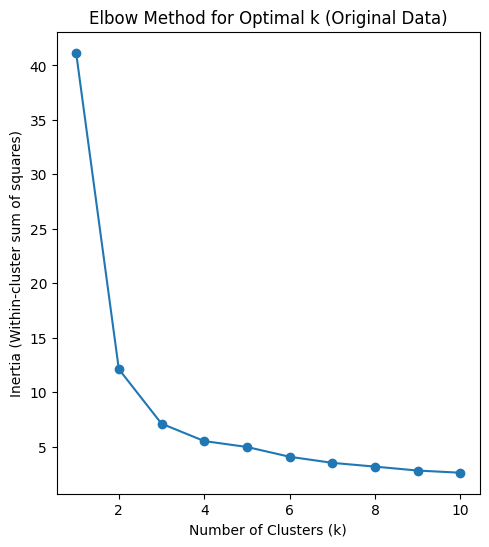

In [32]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert data to Pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)

# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


# --- Elbow Method for Original Data ---

inertia_original = []
k_range = range(1, 11)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia_original.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.

# Plot the elbow method graph for original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_original, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k (Original Data)')

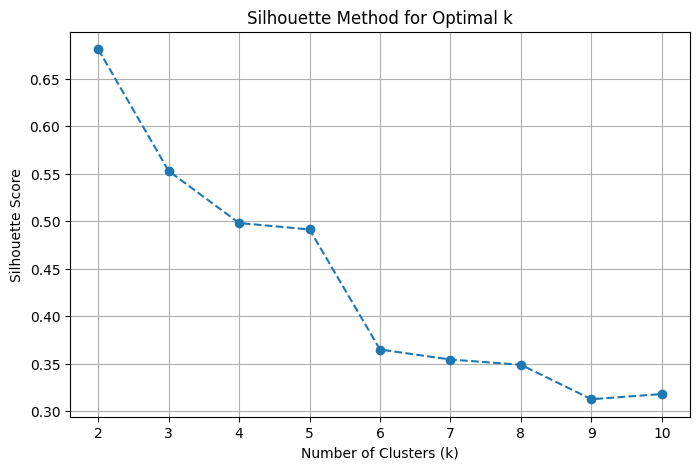

In [35]:
# Compute silhouette scores for different k values
silhouette_scores = []
K = range(2, 11)  # Start from k=2 (since k=1 has no separation)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [56]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [57]:
labels = kmeans.labels_

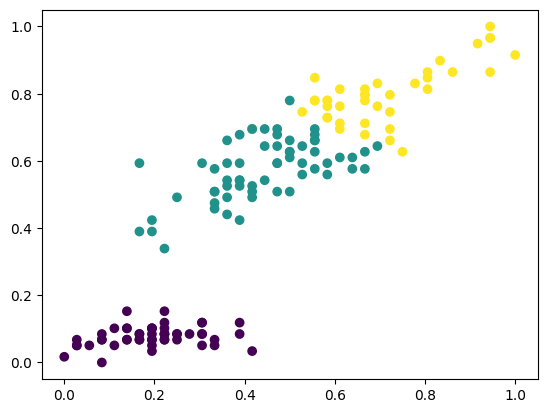

In [59]:
plt.scatter(df[:,0],df[:,2],c=labels)

In [60]:
from sklearn.cluster import DBSCAN,MiniBatchKMeans

In [61]:
mini = MiniBatchKMeans(n_clusters=3)

In [62]:
mini.fit(df)

MiniBatchKMeans(n_clusters=3)

In [63]:
mini_labels = mini.labels_

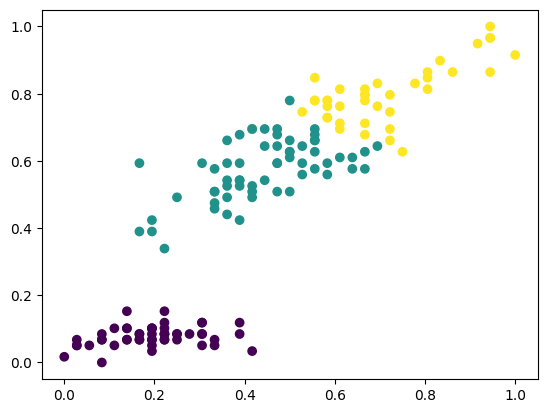

In [65]:
plt.scatter(df[:,0],df[:,2],c=mini_labels)

In [66]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, mini_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.550
